In [24]:
import tensorflow as tf
from tensorflow import keras
import matplotlib.pyplot as plt
%matplotlib inline
import numpy as np
from tensorflow.keras.callbacks import TensorBoard
from time import time

In [25]:
(xtrain,ytrain),(xtest,ytest)=keras.datasets.mnist.load_data()

In [26]:
xtrain[0]


array([[  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   3,
         18,  18,  18, 126, 136, 175,  26, 166, 255, 247, 127,   0,   0,
          0,   0],
       [  

In [10]:
xflat=xtrain.reshape(len(xtrain),28*28)
xflat[0]



array([  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
         0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
         0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
         0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
         0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
         0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
         0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
         0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
         0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
         0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
         0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
         0,   0,   0,   0,   0,   0,   0,   0,   0,   3,  18,  18,  18,
       126, 136, 175,  26, 166, 255, 247, 127,   0,   0,   0,   0,   0,
         0,   0,   0,   0,   0,   0,   0,  30,  36,  94, 154, 17

In [27]:
xflat=xtrain.reshape(len(xtrain),28*28)

In [28]:
xflatest=xtest.reshape(len(xtest),28*28)

In [53]:
model = keras.Sequential([
    keras.layers.Flatten(input_shape=(28, 28)),
    keras.layers.Dense(100, activation='relu'),
    keras.layers.Dense(10, activation='sigmoid')
])

model.compile(optimizer='adam',
              loss='sparse_categorical_crossentropy',
              metrics=['accuracy'])
tf_callback=TensorBoard(log_dir='Logs/{}'.format(time()))
model.fit(xtrain, ytrain, epochs=5,callbacks=[tf_callback])

Epoch 1/5
1875/1875 [==============================] - 13s 5ms/step - loss: 2.6319 - accuracy: 0.8426
Epoch 2/5
1875/1875 [==============================] - 8s 4ms/step - loss: 0.4295 - accuracy: 0.8940
Epoch 3/5
1875/1875 [==============================] - 9s 5ms/step - loss: 0.3116 - accuracy: 0.9188
Epoch 4/5
1875/1875 [==============================] - 8s 4ms/step - loss: 0.2716 - accuracy: 0.9289
Epoch 5/5
1875/1875 [==============================] - 9s 5ms/step - loss: 0.2357 - accuracy: 0.9375


In [42]:
model.evaluate(xtest,ytest)

313/313 [==============================] - 2s 5ms/step - loss: 0.2461 - accuracy: 0.9404


[0.24606460332870483, 0.9404000043869019]

In [43]:
yp=model.predict(xtest)
yp[0]

array([9.9999928e-01, 1.0000000e+00, 1.0000000e+00, 1.0000000e+00,
       1.0000000e+00, 1.0000000e+00, 1.7546821e-20, 1.0000000e+00,
       9.9999905e-01, 1.0000000e+00], dtype=float32)

In [ ]:
plt.matshow(xtest[0])


In [ ]:
ytest[0]

In [44]:
yplabel=[np.argmax(i) for  i in yp]

In [45]:
cm=tf.math.confusion_matrix(labels=ytest,predictions=yplabel)
cm

<tf.Tensor: shape=(10, 10), dtype=int32, numpy=
array([[969,   0,   1,   0,   0,   0,   5,   0,   5,   0],
       [405, 727,   0,   0,   0,   0,   1,   1,   1,   0],
       [880,  94,  46,   0,   1,   0,   2,   1,   7,   1],
       [910,  61,  11,  19,   0,   1,   0,   1,   7,   0],
       [742, 165,  28,   0,  28,   5,   2,   0,  11,   1],
       [809,   9,  10,  14,   3,  39,   2,   0,   5,   1],
       [698,  45,   6,   0,   0,  30, 177,   0,   2,   0],
       [559, 360,  76,   0,   8,   3,   0,  20,   1,   1],
       [932,   6,   6,   1,   1,   1,   2,   0,  25,   0],
       [899,  62,  17,   4,   6,   2,   1,   3,   5,  10]])>

<AxesSubplot:>

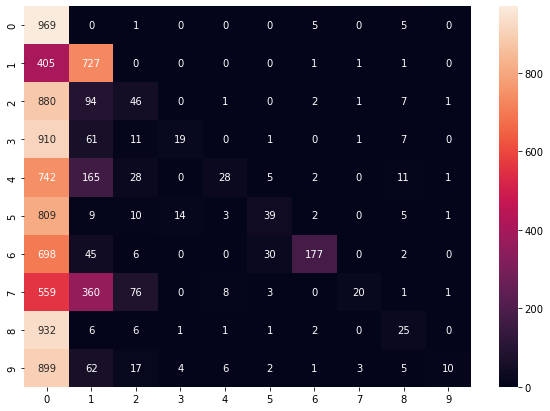

In [46]:
import seaborn as sn
plt.figure(figsize=(10,7))
sn.heatmap(cm,annot=True,fmt='d')

The tensorboard extension is already loaded. To reload it, use:
  %reload_ext tensorboard


UsageError: Line magic function `%tensorboard--logdir` not found.


In [61]:
%load_ext tensorboard
%tensorboard --logdir Logs/fit

The tensorboard extension is already loaded. To reload it, use:
  %reload_ext tensorboard


Reusing TensorBoard on port 6006 (pid 4668), started 0:01:43 ago. (Use '!kill 4668' to kill it.)